# Barres tendues 
## Ned max 

Ce premier code donne Ned max  en fonction de l'air, le type de charge et la classe d'humidté 

pour chaque type de bois 

In [9]:
# Définition des paramètres des types de bois
import pandas as pd

parametres_bois = {
    "C16": {"f_t0_d": 8.5, "description": "Bois massif - Classe C16"},
    "C24": {"f_t0_d": 11.2, "description": "Bois massif - Classe C24"},
    "C30": {"f_t0_d": 10.6, "description": "Bois massif - Classe C30"},
    "D30": {"f_t0_d": 10.7, "description": "Bois massif - Classe D30"},
    "GL20h": {"f_t0_d": 11.3, "description": "Bois lamellé collé - GL20h"},
    "GL24c": {"f_t0_d": 11.3, "description": "Bois lamellé collé - GL24c"},
    "GL24h": {"f_t0_d": 12.8, "description": "Bois lamellé collé - GL24h"},
    "GL28c": {"f_t0_d": 13.0, "description": "Bois lamellé collé - GL28c"},
    "GL28h": {"f_t0_d": 14.9, "description": "Bois lamellé collé - GL28h"},
    "GL32c": {"f_t0_d": 13.0, "description": "Bois lamellé collé - GL32c"},
    "GL32h": {"f_t0_d": 17.1, "description": "Bois lamellé collé - GL32h"}
}

# Fonction de calcul
def calculer_resistance(Anette, type_charge, classe_humidite):
    """
    Calcule et retourne les résistances pour tous les types de bois.
    """
    # Facteur ηt en fonction de la durée de charge
    eta_t = 1.0 if type_charge == "période infinie" else 1.4

    # Facteur ηw en fonction de la classe d'humidité
    eta_w = {1: 1.0, 2: 0.8, 3: 0.6}[classe_humidite]

    # Liste pour stocker les résultats
    resultats = []

    # Calcul pour chaque type de bois
    for type_bois, data in parametres_bois.items():
        f_t0_d = data["f_t0_d"]
        resistance = f_t0_d * eta_t * eta_w
        Ned = resistance * Anette
        resultats.append({
            "Type de Bois": data["description"],
            "Résistance (f_t0_d)": f_t0_d,
            "Résistance Modifiée (N/mm²)": round(resistance, 2),
            "Force de Traction (Ned)": round(Ned, 2)
        })

    return pd.DataFrame(resultats)

# Entrée des paramètres utilisateur
Anette = 1500  # Section nette en mm²
type_charge = "choc"  # 'choc' ou 'période infinie'
classe_humidite = 2  # Classe d'humidité (1, 2 ou 3)

# Exécution des calculs
df_resultats = calculer_resistance(Anette, type_charge, classe_humidite)

# Affichage des résultats
print("### Résultats de Dimensionnement ###")
df_resultats


### Résultats de Dimensionnement ###


,Type de Bois,Résistance (f_t0_d),Résistance Modifiée (N/mm²),Force de Traction (Ned)
0,Bois massif - Classe C16,8.5,9.52,14280.0
1,Bois massif - Classe C24,11.2,12.54,18816.0
2,Bois massif - Classe C30,10.6,11.87,17808.0
3,Bois massif - Classe D30,10.7,11.98,17976.0
4,Bois lamellé collé - GL20h,11.3,12.66,18984.0
5,Bois lamellé collé - GL24c,11.3,12.66,18984.0
6,Bois lamellé collé - GL24h,12.8,14.34,21504.0
7,Bois lamellé collé - GL28c,13.0,14.56,21840.0
8,Bois lamellé collé - GL28h,14.9,16.69,25032.0
9,Bois lamellé collé - GL32c,13.0,14.56,21840.0


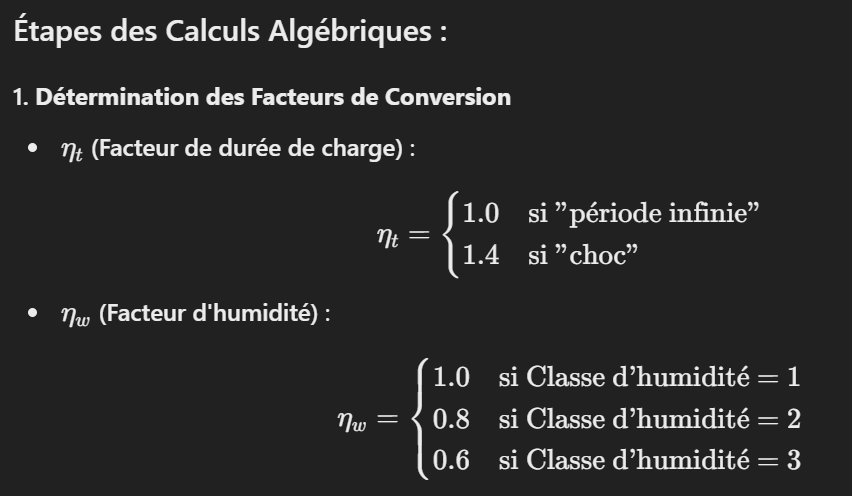
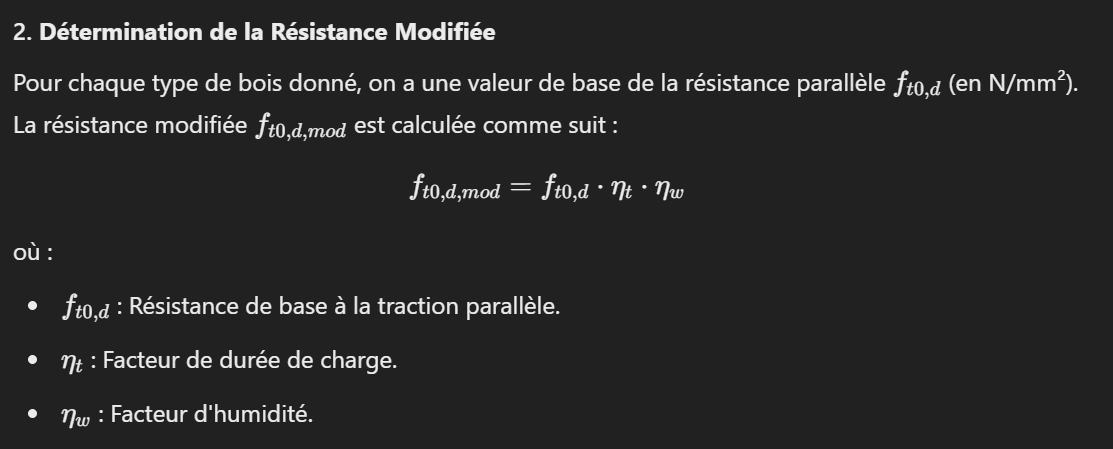
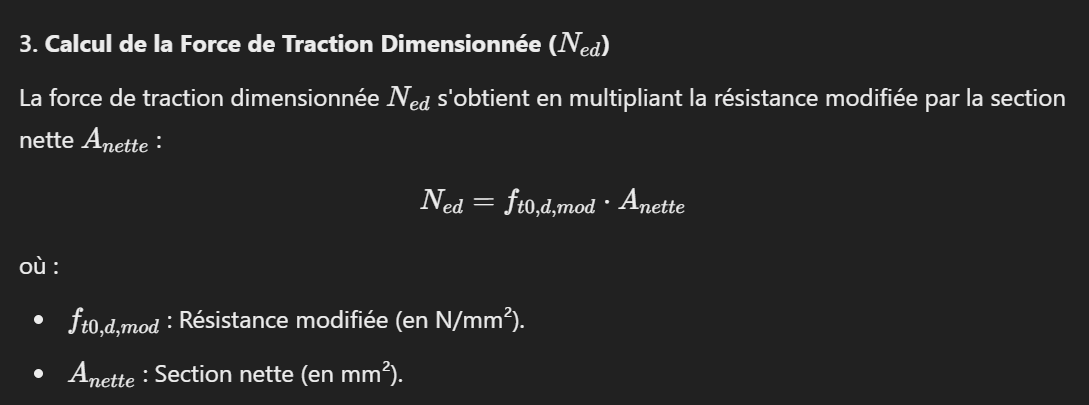


# Barres tendues 
## Anette min.

ce code donne l'air minimum en fonction de Ned, le type de charge, la classe d'humidité et le type de bois

In [1]:
# Définition des paramètres des types de bois
parametres_bois = {
    "C16": {"f_t0_d": 8.5, "description": "Bois massif - Classe C16"},
    "C24": {"f_t0_d": 11.2, "description": "Bois massif - Classe C24"},
    "C30": {"f_t0_d": 10.6, "description": "Bois massif - Classe C30"},
    "D30": {"f_t0_d": 10.7, "description": "Bois massif - Classe D30"},
    "GL20h": {"f_t0_d": 11.3, "description": "Bois lamellé collé - GL20h"},
    "GL24c": {"f_t0_d": 11.3, "description": "Bois lamellé collé - GL24c"},
    "GL24h": {"f_t0_d": 12.8, "description": "Bois lamellé collé - GL24h"},
    "GL28c": {"f_t0_d": 13.0, "description": "Bois lamellé collé - GL28c"},
    "GL28h": {"f_t0_d": 14.9, "description": "Bois lamellé collé - GL28h"},
    "GL32c": {"f_t0_d": 13.0, "description": "Bois lamellé collé - GL32c"},
    "GL32h": {"f_t0_d": 17.1, "description": "Bois lamellé collé - GL32h"}
}

# Fonction pour calculer la section nette minimale
def calculer_section_min(entrées):
    """
    Calcule la section nette minimale pour résister à une force N_ed.
    """
    Ned = entrées["Ned"]
    type_bois = entrées["type_bois"]
    type_charge = entrées["type_charge"]
    classe_humidite = entrées["classe_humidite"]

    # Sélection des propriétés du bois
    if type_bois not in parametres_bois:
        raise ValueError(f"Type de bois invalide. Choisir parmi : {', '.join(parametres_bois.keys())}")
    
    f_t0_d = parametres_bois[type_bois]["f_t0_d"]
    description = parametres_bois[type_bois]["description"]
    
    # Facteur ηt (durée de charge)
    eta_t = 1.0 if type_charge == "période infinie" else 1.4
    
    # Facteur ηw (classe d'humidité)
    eta_w = {1: 1.0, 2: 0.8, 3: 0.6}[classe_humidite]
    
    # Résistance modifiée
    f_t0_d_mod = f_t0_d * eta_t * eta_w
    
    # Calcul de A_nette minimal
    Anette_min = Ned / f_t0_d_mod
    
    # Affichage des résultats
    print("\n### Résultats du Calcul ###")
    print(f"Type de bois : {description}")
    print(f"Résistance de base (f_t0_d) : {f_t0_d} N/mm²")
    print(f"Résistance modifiée (f_t0_d_mod) : {f_t0_d_mod:.2f} N/mm²")
    print(f"Force donnée (N_ed) : {Ned} N")
    print(f"Section nette minimale (A_nette_min) : {Anette_min:.2f} mm²")
    
    return Anette_min

# Entrée groupée des paramètres
entrées = {
    "Ned": 25000,  # Force de traction dimensionnée en N
    "type_bois": "GL28h",  # Type de bois
    "type_charge": "choc",  # 'choc' ou 'période infinie'
    "classe_humidite": 2  # Classe d'humidité (1, 2 ou 3)
}

# Exécution des calculs
Anette_min = calculer_section_min(entrées)



### Résultats du Calcul ###
Type de bois : Bois lamellé collé - GL28h
Résistance de base (f_t0_d) : 14.9 N/mm²
Résistance modifiée (f_t0_d_mod) : 16.69 N/mm²
Force donnée (N_ed) : 25000 N
Section nette minimale (A_nette_min) : 1498.08 mm²


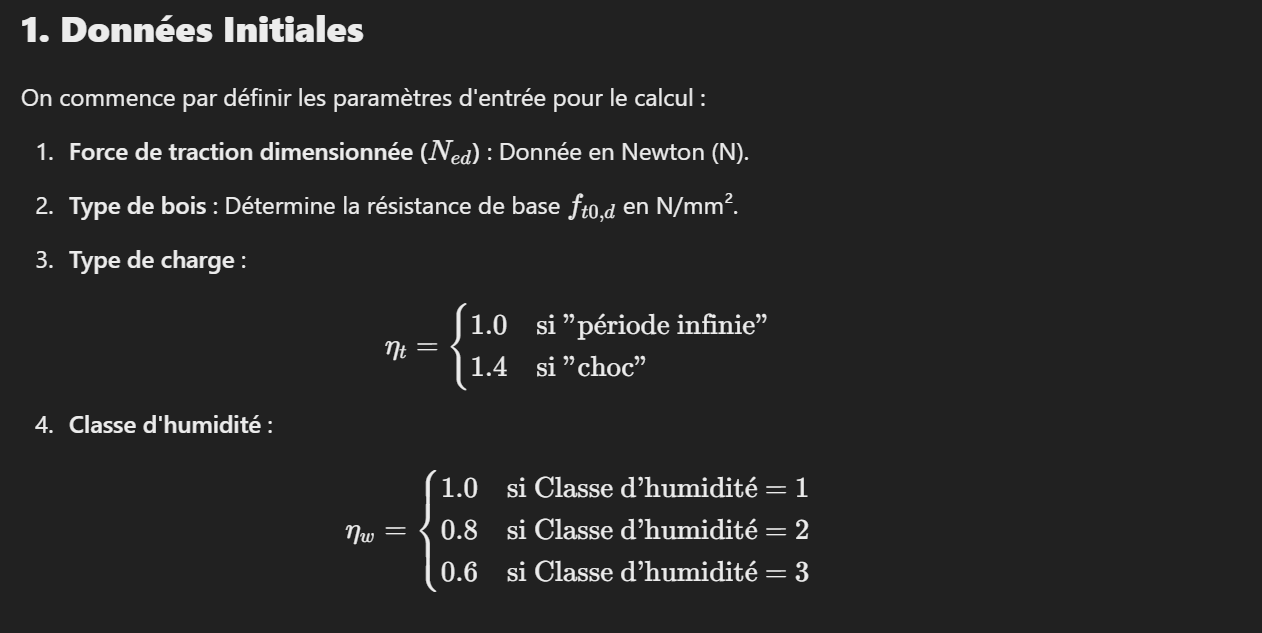
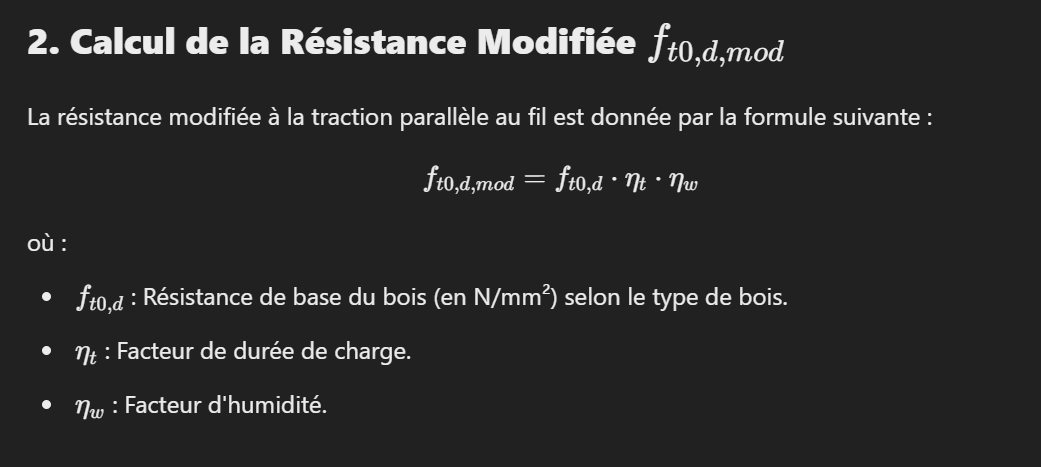
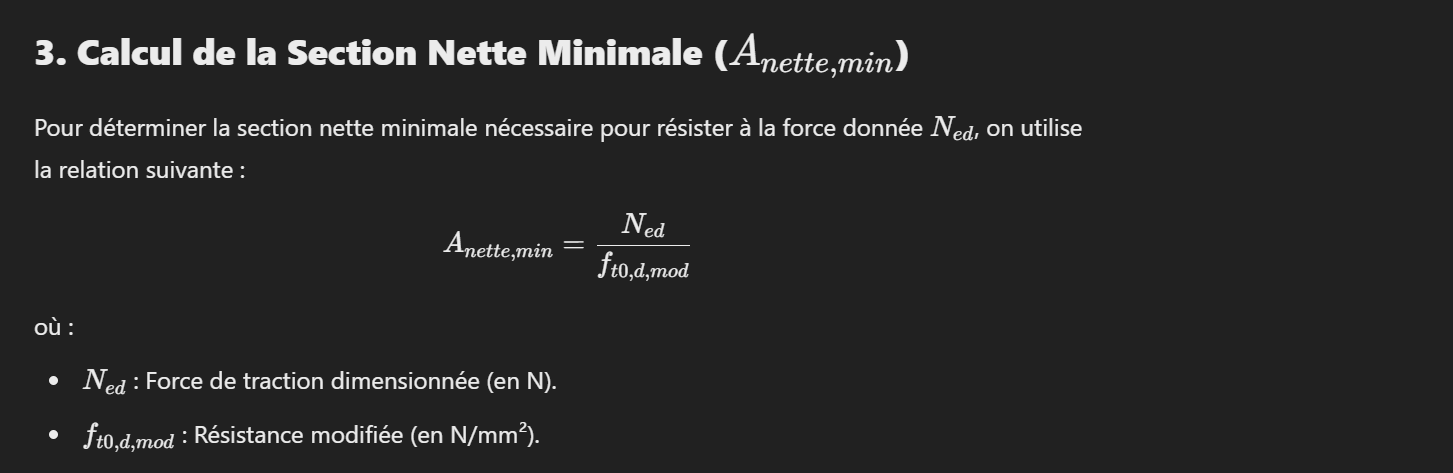

SOURCE :
 Dimensionement des structure en bois (aide a l'utilisation des normes SIA 260, 261 et 265)- Pierre André Dupraz - HEPIA 2023